# Cat vs Dog Image Classification with a Convolutional Neural Network
## Evaluating the filters of a CNN and visualizing what they learn

### Overview

This simulation focuses on a Cat vs Dog image classification task using a Convolutional Neural Network (CNN). The primary goal is to visualize the filters of the CNN and understand what exactly they learn (even though it gets uninterpretable far too quickly - but that's part of the fun!).

## Neural Networks

![](images/neural.jpg)

To begin, neural networks are a class of machine learning models that have seen widespread use in the past decade. They consist of interconnected nodes organized into layers. The three main types of layers in a neural network are:

1. **Input Layer:** This layer simply receives the input
2. **Hidden Layers:** Layers between the input and output layers where all of the learning occurs.
3. **Output Layer:** The layer that produces the final predictions given some activation function.

Mathematically, the output ($y$) of a neural network for a given input ($x$) is determined by the weights ($W$) and biases ($b$) associated with each neuron, as well as the activation function ($f$) applied to the weighted sum of inputs:

$$ y = f(W \cdot x + b) $$

As stated previously, there is an activation function attached to each layer to provide some non-linearity to the model (and help with gradient descent). In the hidden layers, the activation is typically a ReLU function $f(x) = max(0, x)$, while the output layer activation depends on the task at hand. For example, for a regression task, the output layer activation is typically the identity function $f(x) = x$, while for a binary classification task, the output layer activation is typically the sigmoid function $f(x) = \frac{1}{1 + e^{-x}}$ which constraints the output to be between 0 and 1.

#### Convolutional Neural Networks (CNNs)

![](images/cnn.png)

A Convolutional Neural Network is a class of neural networks particularly well-suited for image-related tasks. They have proven to be highly effective in image tasks because of one mathematical operation: convolution. This operation in the ML sense involves applying a filter (a matrix of weights) to the input image and essentially sliding it around the image - which still follows suit with what convolution IS: a mathematical operation on two functions that provides a third functin. 

Mathematically, the convolution operation can be expressed as:

$$ S(i, j) = (I * K)(i, j) = \sum_{m} \sum_{n} I(m, n) \cdot K(i - m, j - n) $$

where:
- ($I$) is the input image,
- ($K$) is the filter,
- ($S(i, j)$) is the output feature map at position $(i, j)$.

With CNNs, the convolutional layer is typically followed by a Pooling layer which reduces the dimensionality of the input. This is usually done by taking the max or average of the values in a certain region of the input (the convolutional output). This helps with computational efficiency and makes the network more robust to variations in input.

At the end, before classification, we must flatten the data so we can feed it into a one-dimensional layer. This layer will decode the output and be fed into a sigmoid layer for binary classification so the model can say if it thinks the image is likely to be a cat or a dog.

#### Visualization of Filters

To understand what the neural network learns, it's best to see what the model "sees" at each filter in each layer. These filters, since I haven't mentioned it yet (oops!), are really just learning random features. You can think about these filters as if they were filters you would put on an instgram post. One might sharpen the image to draw out the edges, one might blur the image, one might highlight the eyes or the ears. It can really do anything. This gets pretty abstract the further into the model you go since... well... the model is applying a ton of filters and it's just trying things almost at random to see what works. Not to mention, while these filters might have some sort of significane to the model, it may be completely arbitrary and meaningless to us. The visualization of the filter should only be clear for the first few layers as it's learning basic features like edges and shapes.

### Simulation Process

The notebook is laid out in the following order:

0. [Imports and Constants](#0.-Imports-and-Constants)
1. [Data Preprocessing](#1.-Data-Preprocessing)
2. [CNN](#2.-CNN)
3. [Evaluating the filters of a CNN and what they learn](#3.-Evaluating-the-filters-of-a-CNN-and-what-they-learn)

### Conclusion

Ideally this notebook will teach you a very surface level understanding of CNNs and what these filters are really doing. It can get pretty abstract, but that's partly what makes it so interesting! Feel free to change the images and see what the filters display! If you decide to train the model even more, you'll see that the filters will have more 'data' in them and that's becauese it'll be learning a lot more. I only trained it for 5 epochs which took about 40 minutes (because tensorflow > 2.10 no longer supports GPUs on windows and I couldn't install an earlier version). If you have a GPU and want to use it, make sure you have the right CUDA version and CUDNN, I've used [this table](https://www.tensorflow.org/install/source#tested_build_configurations), ([for windows](https://www.tensorflow.org/install/source_windows)... didn't know they made a new one for windows :|)for a ton of my projects and it'll tell you what versions you need to install to have everything be compatible!

### Dataset Information
Apparently it is on [tensorflow datasets library](https://www.tensorflow.org/datasets/catalog/cats_vs_dogs), but for some reason it didn't work with my configuration.
I clicked on the homepage link on there and downloaded it from this [microsoft website](https://www.microsoft.com/en-us/download/details.aspx?id=54765) and it worked fine. I renamed the outer folder to data and had to do some small data cleaning!

## 0. Imports and Constants

In [61]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras import models
from keras import layers
from keras.preprocessing import image
from keras.utils import image_dataset_from_directory
import os
import glob

In [62]:
DATA_DIR = 'data/'
EPOCHS = 5
BATCH_SIZE = 32
IMAGE_SIZE = (256, 256)
IMAGE_NUMBER = 1
CAT_EXAMPLE = f'data/Cat/{IMAGE_NUMBER}.jpg'
DOG_EXAMPLE = f'data/Dog/{IMAGE_NUMBER}.jpg'

## 1. Data Preprocessing

### 1.1. Removing non jpg files

In [63]:
for file in os.listdir(DATA_DIR + 'Dog/'):
    if not file.endswith('.jpg'):
        print(file)

### 1.2. Removing corrupted images

In [72]:
img_paths = glob.glob(os.path.join(DATA_DIR,'*/*.*'))

bad_paths = []

for image_path in img_paths:
    try:
      img_bytes = tf.io.read_file(image_path)
      decoded_img = tf.io.decode_image(img_bytes)
    except tf.errors.InvalidArgumentError as e:
      bad_paths.append(image_path)

for bad_path in bad_paths:
    os.remove(bad_path)

Found bad path data\Cat\10404.jpg...{{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 
Found bad path data\Cat\4351.jpg...{{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input size should match (header_size + row_size * abs_height) but they differ by 2 [Op:DecodeImage] name: 
Found bad path data\Cat\666.jpg...{{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input is empty. [Op:DecodeImage] name: 
Found bad path data\Dog\11233.jpg...{{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Number of channels inherent in the image must be 1, 3 or 4, was 2 [Op:DecodeImage] name: 
Found bad path data\Dog\11702.jpg...{{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input is empty. [Op:DecodeImage] 

### 1.3. Creating dataset

In [74]:
dataset = image_dataset_from_directory(
    DATA_DIR,
    labels='inferred',
    label_mode='binary',
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE)

Found 24991 files belonging to 2 classes.


## 2. CNN

### 2.1. Creating with 4 convolutional layers and 2 decoders

In [77]:
model = models.Sequential() 
  
model.add(layers.Conv2D(32, (3, 3), activation ='relu', input_shape =IMAGE_SIZE + (3,))) 
model.add(layers.MaxPooling2D((2, 2))) 
  
model.add(layers.Conv2D(64, (3, 3), activation ='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
  
model.add(layers.Conv2D(128, (3, 3), activation ='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
  
model.add(layers.Conv2D(128, (3, 3), activation ='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
  
model.add(layers.Flatten()) 
  
model.add(layers.Dense(512, activation ='relu')) 
model.add(layers.Dense(1, activation ="sigmoid")) 
  
model.summary() 

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 30, 30, 128)      

### 2.2. Compiling and fitting the model

In [78]:
model.compile(loss ='binary_crossentropy', 
                     optimizer ='rmsprop', 
                   metrics =['accuracy'])
model.fit(dataset, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/5
781/781 [==============================] - 470s 600ms/step - loss: 17.4279 - accuracy: 0.5869
Epoch 2/5
781/781 [==============================] - 470s 602ms/step - loss: 0.5791 - accuracy: 0.7143
Epoch 3/5
781/781 [==============================] - 480s 614ms/step - loss: 0.4600 - accuracy: 0.7908
Epoch 4/5
781/781 [==============================] - 450s 576ms/step - loss: 0.3736 - accuracy: 0.8423
Epoch 5/5
781/781 [==============================] - 449s 574ms/step - loss: 0.2988 - accuracy: 0.8789


### 2.3. Saving the model

In [80]:
model.save('model.keras')

## 3. Evaluating the filters of a CNN and what they learn

### 3.1. Convert images to tensors

In [83]:
def convert_image_to_tensor(path):
    img = image.load_img(path, target_size = IMAGE_SIZE) 
    img_tensor = image.img_to_array(img) 
    img_tensor = np.expand_dims(img_tensor, axis = 0) 
    img_tensor = img_tensor / 255.
    return img_tensor

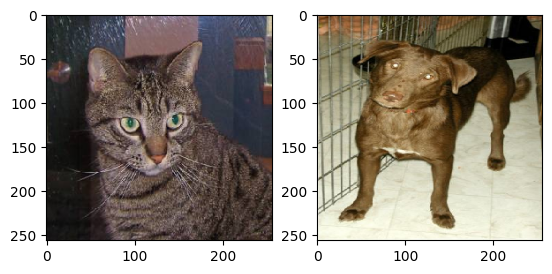

In [84]:
tensor1 = convert_image_to_tensor(CAT_EXAMPLE)
tensor2 = convert_image_to_tensor(DOG_EXAMPLE)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(tensor1[0]) 
ax[1].imshow(tensor2[0])

### 3.2. Evaluating the filters of each convolutional layer
This is done by returning the activation of each layer of a specific tensor and plotting the each separate channels of the activation.

In [99]:
def evaluate_channel_image(layer_idx, tensor, model):
    layer_outputs = [layer.output for layer in model.layers[:8]] 
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 
    activations = activation_model.predict(tensor) 
    layer_activation = activations[layer_idx][0]
    return layer_activation

def plot_activation_layers(tensor, model):
    layer_names = [layer.name for layer in model.layers[:8]]

    for layer_idx, layer_name in enumerate(layer_names):
        layer_activation = evaluate_channel_image(layer_idx, tensor, model)
        channels = layer_activation.shape[-1]  # Number of channels in the tensor
        rows = int(np.sqrt(channels))  # Number of rows in the grid
        cols = int(np.ceil(channels / rows))  # Number of columns in the grid

        fig, axes = plt.subplots(rows, cols, figsize=(10, 10))

        for i in range(channels):
            ax = axes[i // cols, i % cols] if rows > 1 else axes[i % cols]
            ax.imshow(layer_activation[:, :, i], cmap='viridis')
            ax.axis('off')

        plt.suptitle(f'Activation channels for layer: {layer_name}', fontsize=16)
        plt.show()

### 3.3. Evaluating the filters on the cat image

1/1 [==============================] - 0s 69ms/step


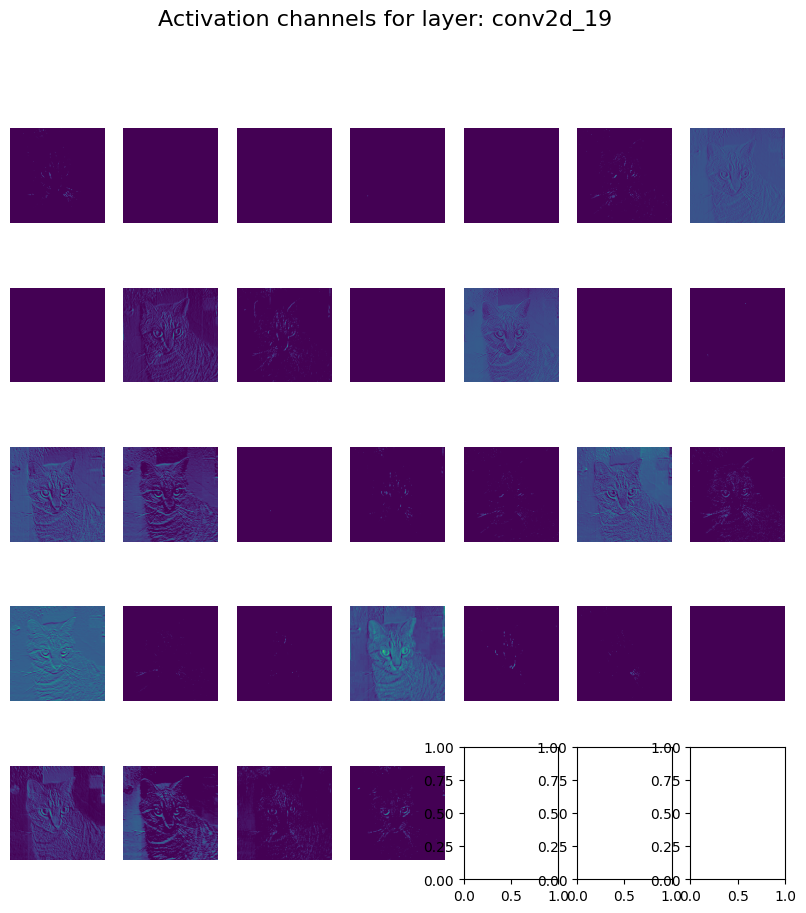

1/1 [==============================] - 0s 72ms/step


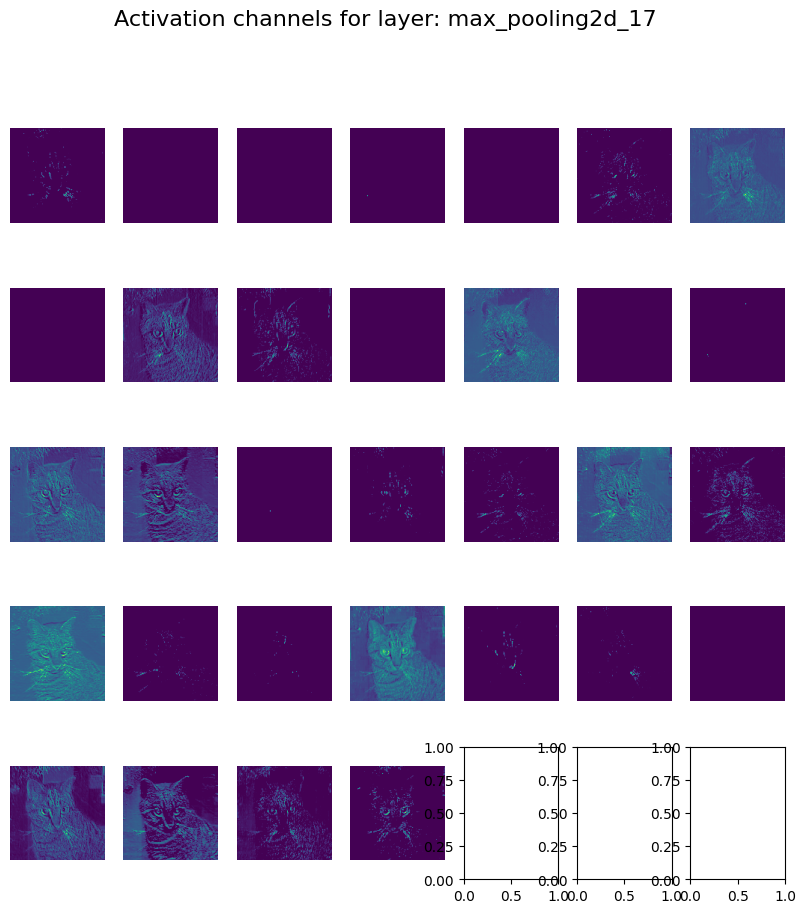

1/1 [==============================] - 0s 64ms/step


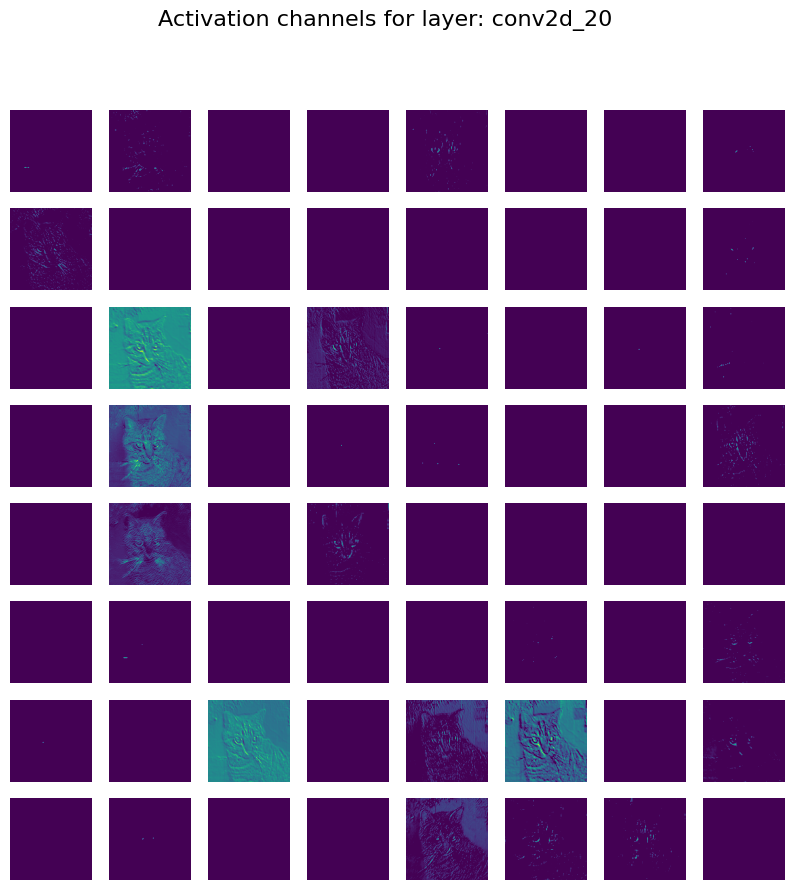

1/1 [==============================] - 0s 80ms/step


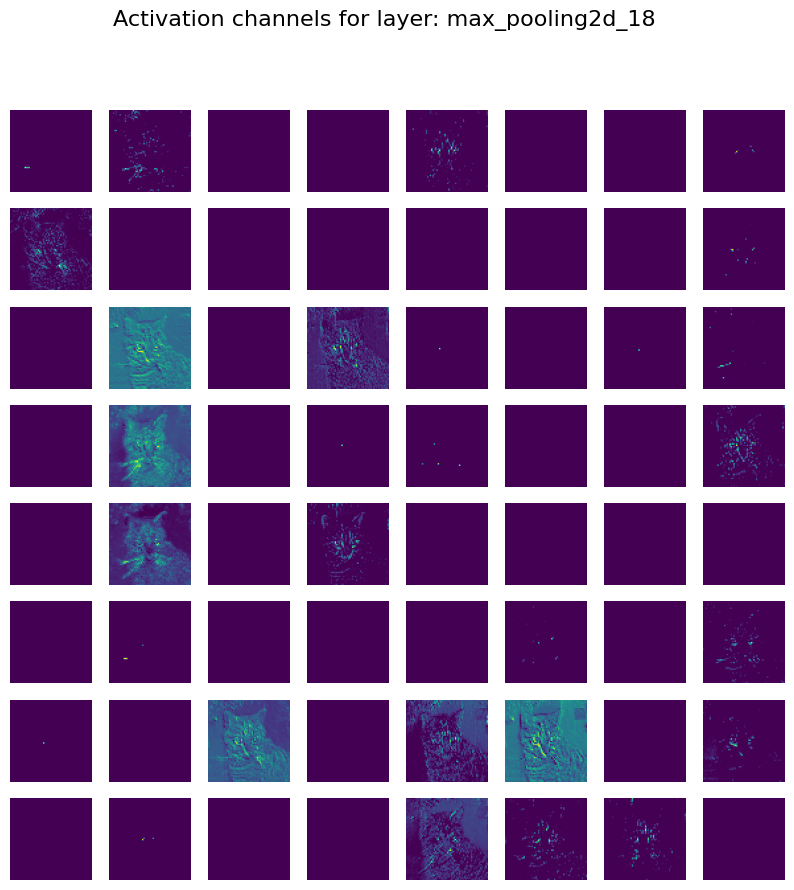

1/1 [==============================] - 0s 65ms/step


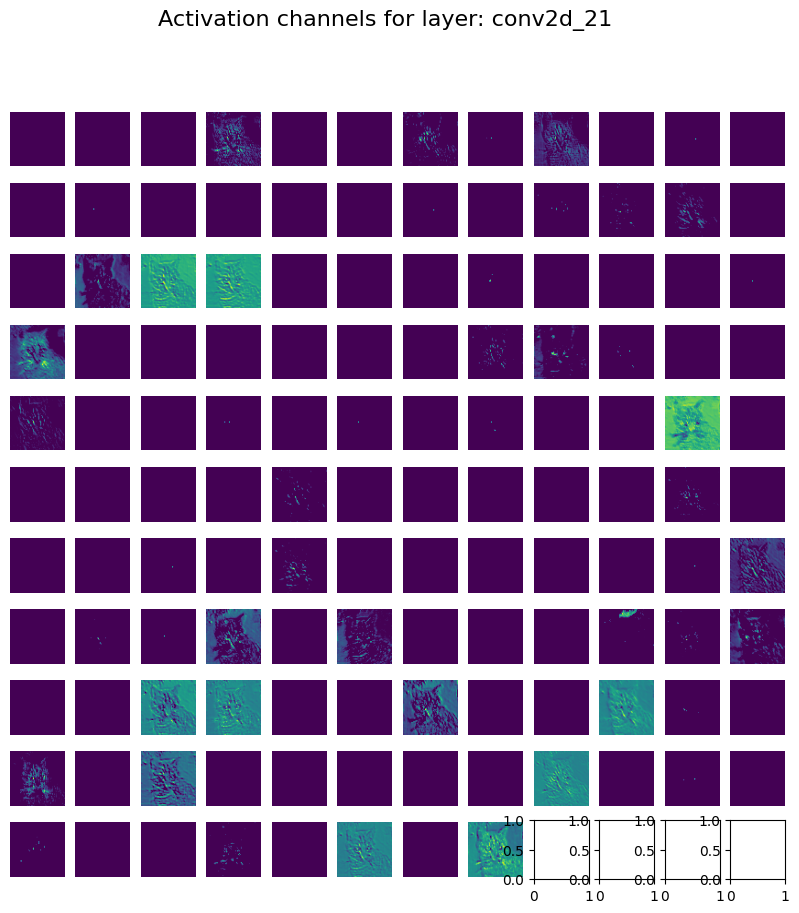

1/1 [==============================] - 0s 71ms/step


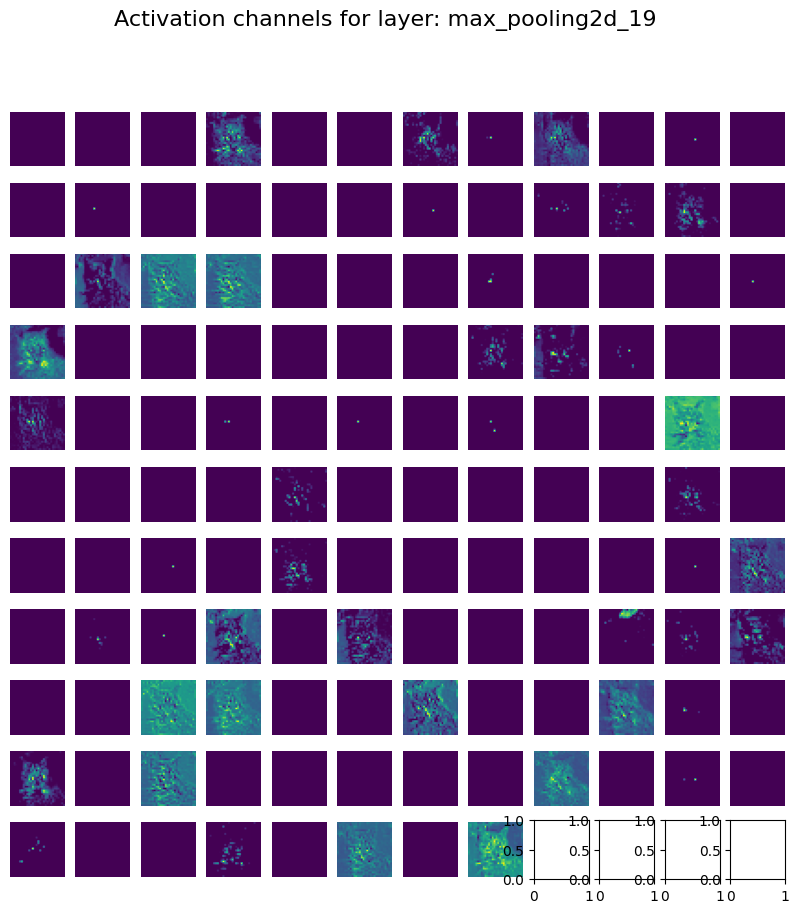

1/1 [==============================] - 0s 62ms/step


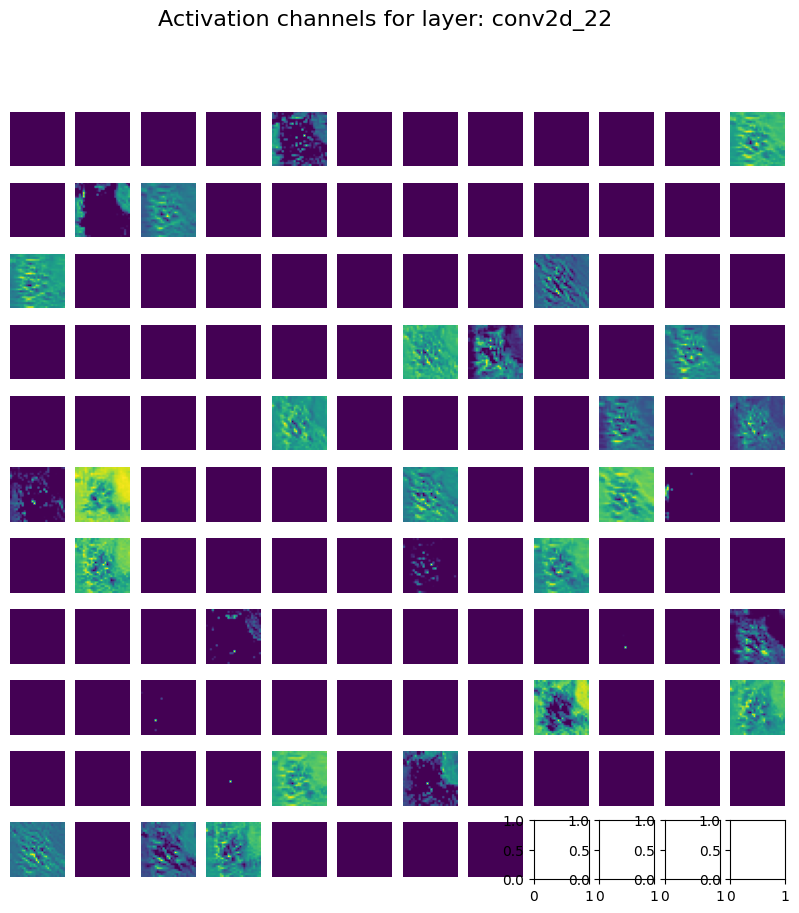

1/1 [==============================] - 0s 65ms/step


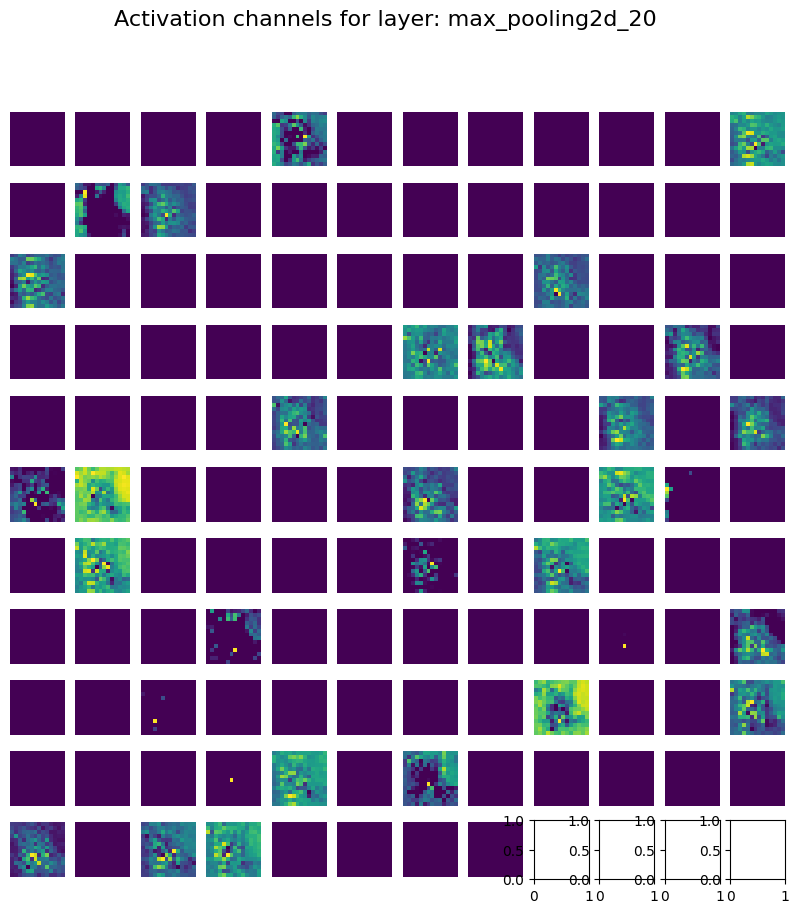

In [100]:
plot_activation_layers(tensor1, model)

### 3.4. Evaluating the filters on the dog image

1/1 [==============================] - 0s 64ms/step


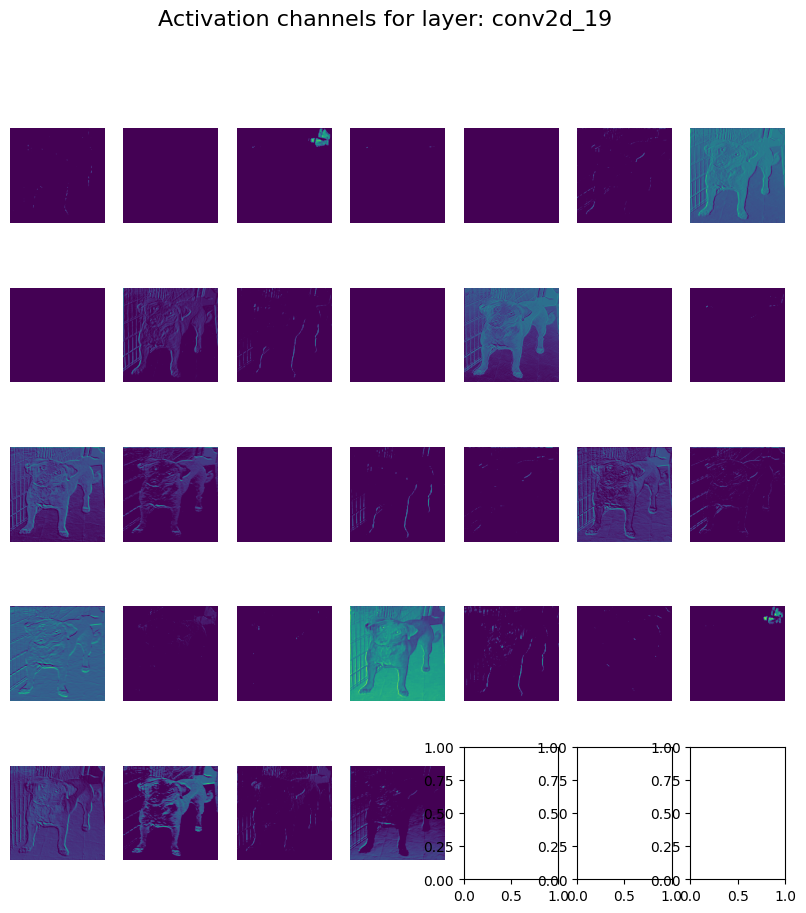

1/1 [==============================] - 0s 64ms/step


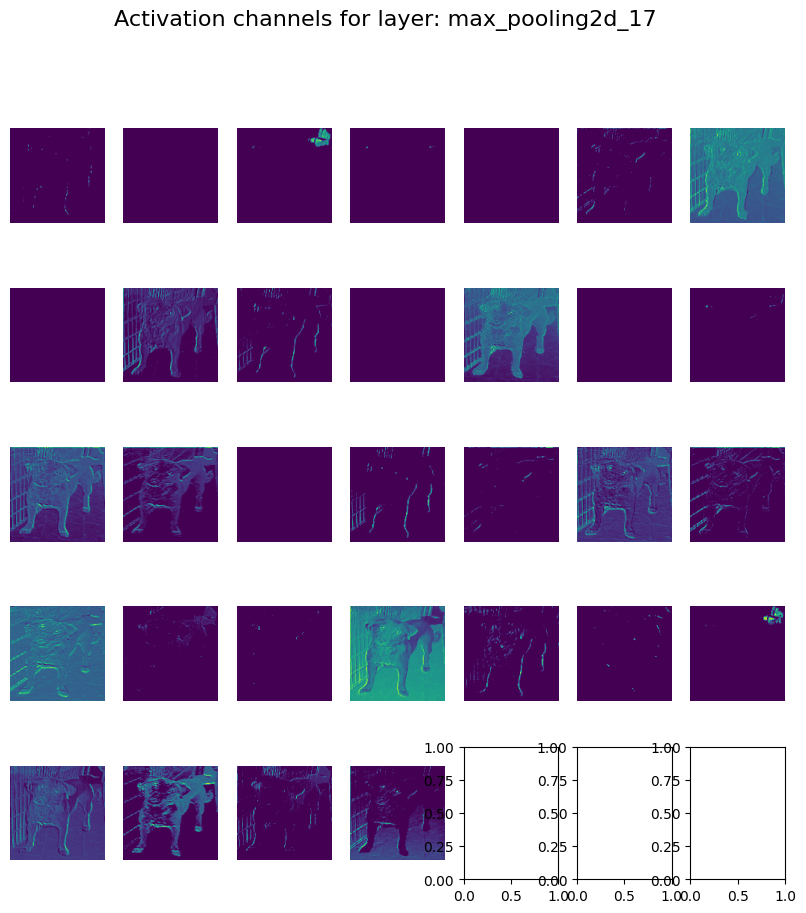

1/1 [==============================] - 0s 65ms/step


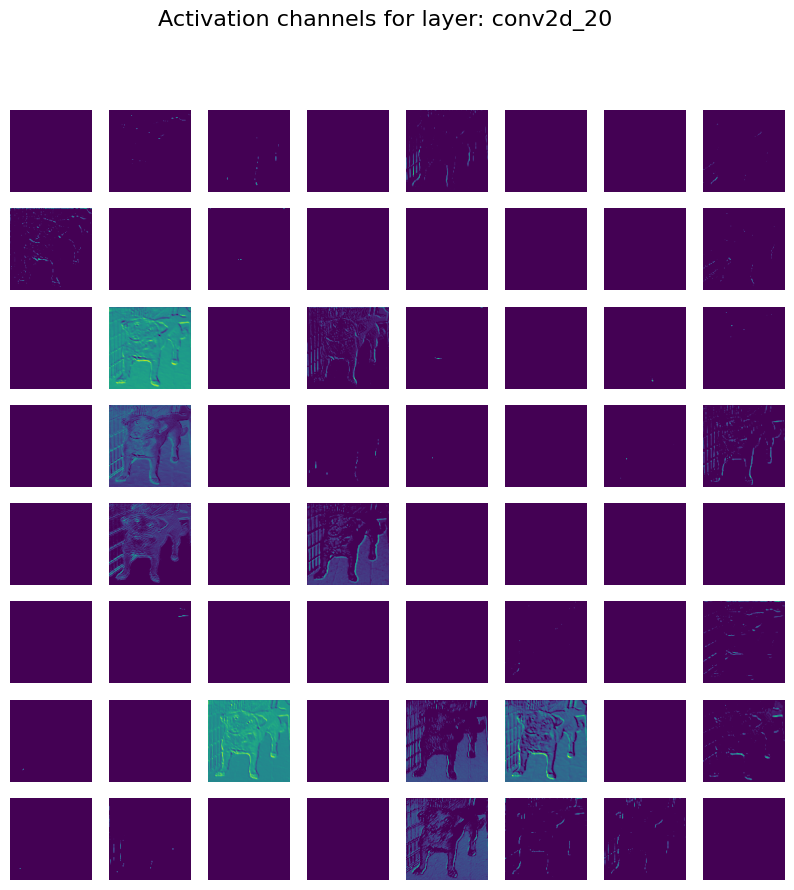

1/1 [==============================] - 0s 65ms/step


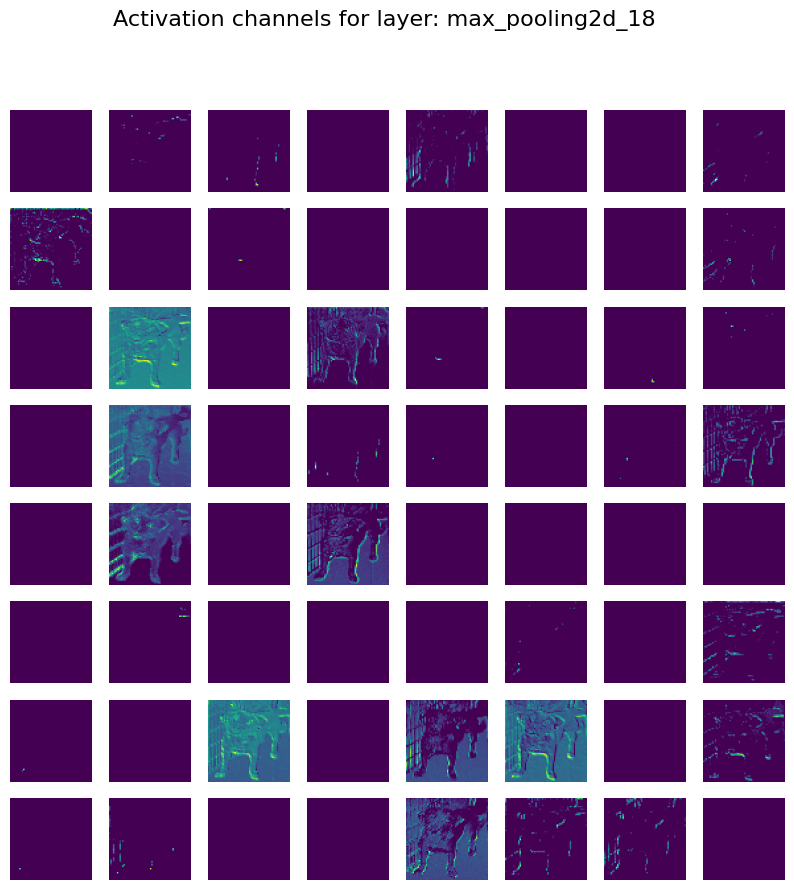

1/1 [==============================] - 0s 64ms/step


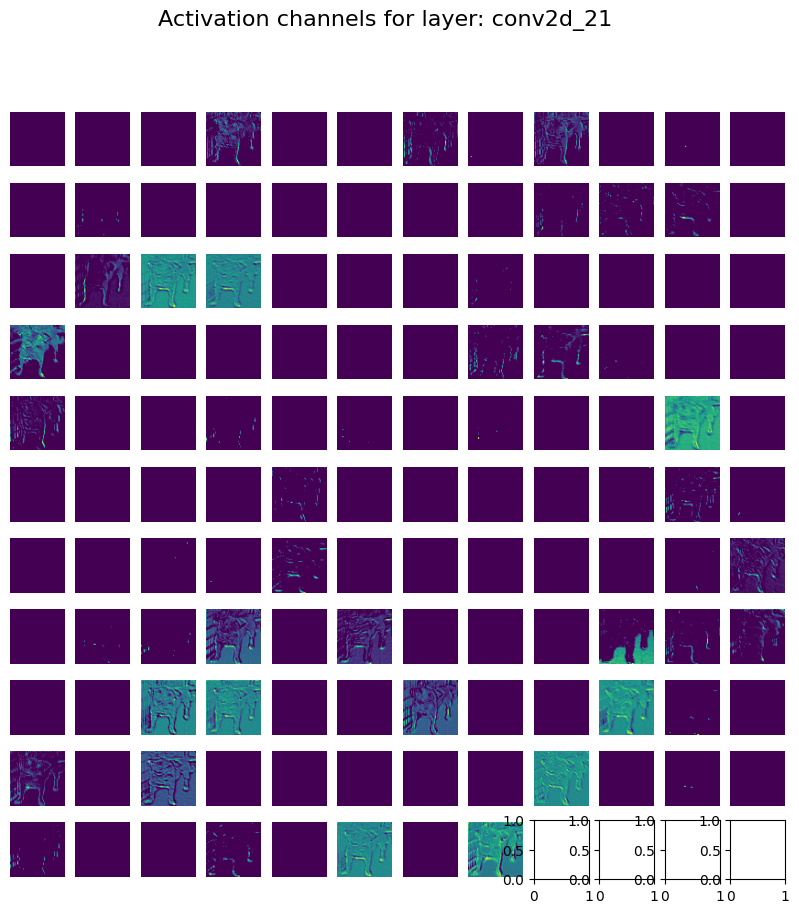

1/1 [==============================] - 0s 72ms/step


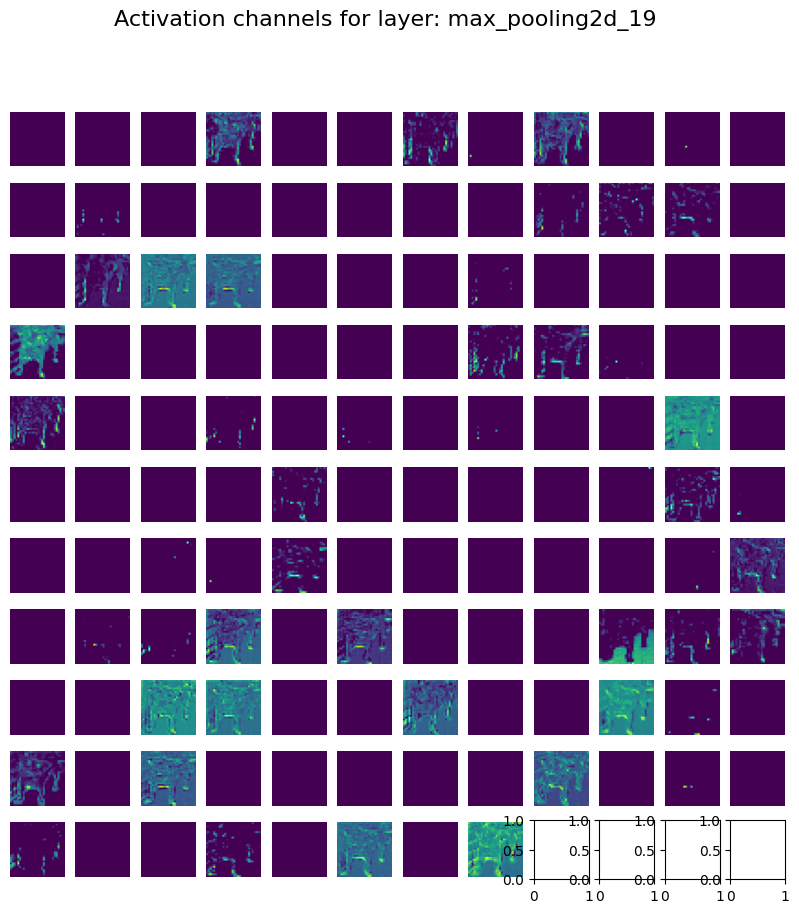

1/1 [==============================] - 0s 68ms/step


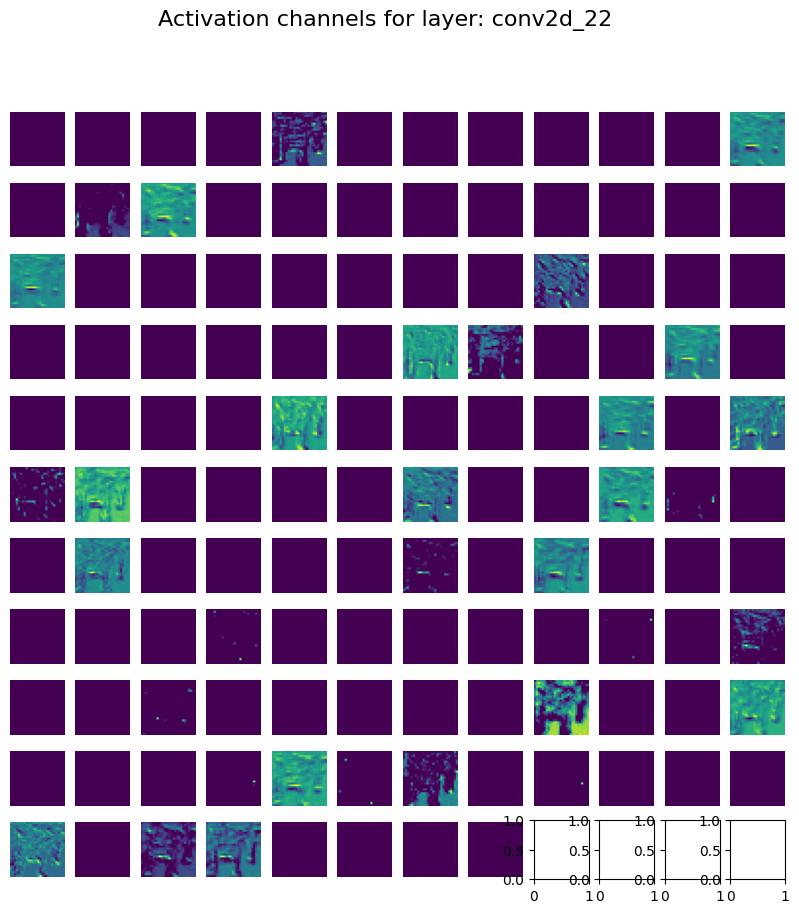

1/1 [==============================] - 0s 76ms/step


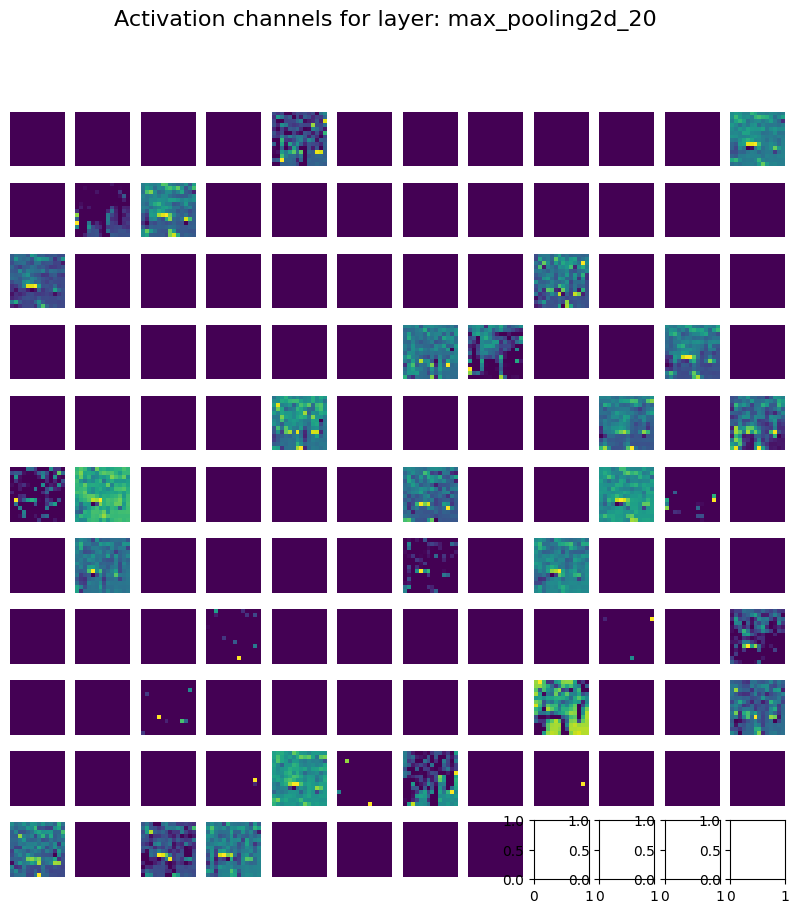

In [101]:
plot_activation_layers(tensor2, model)

### Mini Conclusion
This was the best I could get the filters to display, and it takes up a lot of room. It's nice to see that the last layer just is uninterpretable, but the earlier layers you can still see the face of the cat/dog! Kinda what I was going for with this project.